[3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[[6.87027027 3.08648649 5.74594595 2.08918919]
 [5.9047619  2.74603175 4.41269841 1.43333333]
 [4.71304348 3.12173913 1.4173913  0.19130435]
 [5.25555556 3.67037037 1.5037037  0.28888889]]


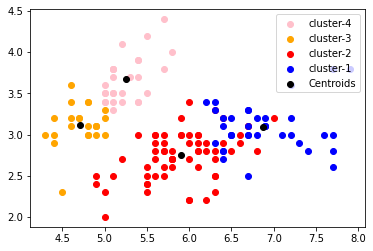

In [66]:
import numpy as np
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

features = np.loadtxt(url, delimiter=",", usecols=[0, 1, 2, 3])  # x (150 x 4)


def k_means(X, k):
    assert k > 0

    def assignPoints(X, mu):
        def dist(row1, row2):
            return np.sum(np.abs(row1 - row2))

        z = []

        differenceArray = np.zeros((X.shape[0], mu.shape[0]))

        for i in range(X.shape[0]):
            for j in range(mu.shape[0]):
                differenceArray[i][j] = dist(X[i], mu[j])

        for i in range(differenceArray.shape[0]):
            z.append(np.argmin(differenceArray[i]))

        return z

    def assignCentroids(X, k, z):

        mu = []

        for i in range(k):
            count = 0
            tempArray = np.zeros(4)
            for j in range(X.shape[0]):
                if z[j] == i:
                    count += 1
                    tempArray += X[j]

            if count > 0:
                mu.append(tempArray / count)
            else:
                mu.append(tempArray / 1)


        mu = np.array(mu)

        return mu

    def iterator(X, k):

        randPicks = np.random.choice(features.shape[0], k)

        startCentroids = X[randPicks, :]

        pointAssignments = assignPoints(X, startCentroids)
        centroidAssignments = assignCentroids(X, k, pointAssignments)

        count = 0

        while count < 1:

            previousCentroids = centroidAssignments
            pointAssignments = assignPoints(X, centroidAssignments)
            centroidAssignments = assignCentroids(X, k, pointAssignments)

            if np.array_equal(previousCentroids, centroidAssignments):
                count += 1

        return pointAssignments, centroidAssignments

    z, mu = iterator(X, k)

    return z, mu


z, mu = k_means(features, 4)

print(z)
print(mu)

c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

for i in range(len(z)):
    if z[i] == 0:
        plt.scatter(features[i][0], features[i][1], color="blue", label="cluster-1" if c1 == 0 else "")
        c1 = 1

    if z[i] == 1:
        plt.scatter(features[i][0], features[i][1], color="red", label="cluster-2" if c2 == 0 else "")
        c2 = 1

    if z[i] == 2:
        plt.scatter(features[i][0], features[i][1], color="orange", label="cluster-3" if c3 == 0 else "")
        c3 = 1

    if z[i] == 3:
        plt.scatter(features[i][0], features[i][1], color="pink", label="cluster-4" if c4 == 0 else "")
        c4 = 1

    if z[i] == 4:
        plt.scatter(features[i][0], features[i][1], color="teal", label="cluster-5" if c5 == 0 else "")
        c5 = 1

    if z[i] == 5:
        plt.scatter(features[i][0], features[i][1], color="gray", label="cluster-6" if c6 == 0 else "")
        c6 = 1

    if z[i] == 6:
        plt.scatter(features[i][0], features[i][1], color="aqua", label="cluster-7" if c7 == 0 else "")
        c7 = 1

    if z[i] == 7:
        plt.scatter(features[i][0], features[i][1], color="purple", label="cluster-8" if c8 == 0 else "")
        c8 = 1

    if z[i] == 8:
        plt.scatter(features[i][0], features[i][1], color="green", label="cluster-9" if c9 == 0 else "")
        c9 = 1

    if z[i] == 9:
        plt.scatter(features[i][0], features[i][1], color="brown", label="cluster-10" if c10 == 0 else "")
        c10 = 1

c11 = 0
for i in range(mu.shape[0]):
    plt.scatter(mu[i][0], mu[i][1], color="black", label="Centroids" if c11 == 0 else "")
    c11 = 1

plt.legend()
plt.show()
